# Introdução à Programação em Python
## Notebook 08 - Programação em grande escala
## Carlos Caleiro, Jaime Ramos
## Dep. Matemática, IST - 2016

(actualizado em 15 de Outubro de 2019)

# Programação por camadas centradas nos dados

## Método

Considere-se o problema conhecido por "torres de Hanoi" (proposto pelo matemático francês Edouard Lucas em 1883). *Existem três postes verticais num mosteiro, num dos quais estão enfiados 64 discos por ordem estritamente crescente de tamanho. Os monges pretendem transferir os discos todos para um dos outros postes, um de cada vez usando o terceiro poste como auxiliar e nunca violando a seguinte restrição: um disco nunca pode ser colocado por cima de outro disco menor. Segundo a lenda, quando os monges terminarem esta tarefa a humanidade terá ganho o acesso ao céu e o mundo acabará...*

O objectivo é desenvolver um programa em Python que resolva o problema (em realidade virtual...). Por onde começar? O método seguinte ajuda nesta questão primordial.

O método de **programação por camadas centradas nos dados** consiste em:

- Primeiro, **identificar a camada dos tipos de dados relevantes**. [Vale a pena especificar de modo abstracto estes tipos de dados.]

No caso vertente, *podemos encarar cada poste como uma pilha* (pois só se pode colocar um disco no topo e retirar um disco do topo de cada vez). Identificou-se assim a camada base sobre a qual se vai desenvolver o programa: esta deve providenciar as operações relevantes sobre as pilhas. [Vale a pena nesta fase experimentar uma especificação abstracta destes tipos de dados.]

- De seguida, **construir esta camada de modo eficiente**. [Existindo especificação abstracta dos tipos vale a pena verificar se a implementação proposta é correcta.]

No seguimento, ilustra-se a *construção da camada das pilhas sobre as listas* do Python.

- Finalmente, **desenvolver o programa sobre esta camada**. 

Capitalizando nas operações já disponíveis das pilhas, torna-se fácil resolver o problema em causa de transferência dos discos de um poste para outro.

- Sublinhe-se que **o método pode ser aplicado repetidamente**, conduzindo a uma sequência de camadas.

Mais adiante são consideradas aplicações relativamente pesadas do método (simulação e demonstração automática) em que surgem naturalmente várias camadas.

## Especificação equacional das pilhas

Um *tipo de dados* é definido através das operações que são possíveis sobre os valores desse tipo e das suas propriedades. Por exemplo, o tipo dos naturais é definido com as operações usuais (sucessor, adição, multiplicação, etc) e com os axiomas necessários sobre estas (axiomas de Peano).

O **tipo das pilhas** é muito mais simples. As *operações* sobre pilhas são informalmente descritas como se segue:
- `new` - a constante que denota a pilha nova vazia.

- `push(x,s)` - a pilha que se obtém da pilha s sobrepondo-lhe o elemento x.

- `pop(s)` - a pilha que se obtém da pilha s retirando-lhe o elemento no topo.

- `top(s)` - o elemento que se encontra no topo da pilha s.

- `emptyQ(s)` - verdadeiro se a pilha s é a vazia; falso caso contrário.

As *propriedades* pretendidas para estas operações são explicitadas pelos seguintes axiomas:

- `pop(push(x,s)) = s`
- `top(push(x,s)) = x`
- `emptyQ(new) = True`
- `emptyQ(push(x,s)) = False`

## Implementação das pilhas sobre listas

Tendo identificado a camada dos tipos de dados relevantes, é agora necessário construir esta camada de modo eficiente, usando estruturas já disponíveis em Python. Neste caso vamos implementar pilhas usando as *listas* da linguagem Python.

Naturalmente, a pilha `new` será representada pela lista vazia. A pilha `push(x,s)` é representada pela lista que se obtém da lista que representa `s` juntando-lhe no fim o elemento `x`. Deste modo, `top(s)` é obtido como o último elemento da lista que representa `s`. A pilha `pop(s)` é representada pela lista obtida de apagar o último elemento da lista que representa `s`. Finalmente, a operação `emptyQ(s)` é facilmente implementada por comparação com `[]`.

In [41]:
def new():
    return []

In [42]:
def push(x,s):
    return s+[x]

In [43]:
def emptyQ(s):
    return s==[]

In [44]:
def pop(s):
    if emptyQ(s):
        print("Erro! A pilha esta vazia.")
    else:
        return s[:len(s)-1]

In [45]:
def top(s):
    if emptyQ(s):
        print("Erro! A pilha esta vazia.")
    else:
        return s[len(s)-1]

Acrescenta-se a operação `view`, que permite visualizar o conteúdo de uma pilha.

In [1]:
def view(s):
    print(s)

Seguem-se alguns exemplos de utilização destas funções:

In [46]:
push(1,new())

[1]

In [47]:
push(2,push(1,new()))

[1, 2]

In [48]:
top(push(2,push(1,new())))

2

In [49]:
top(pop(push(2,push(1,new()))))

1

In [50]:
emptyQ(pop(push(2,push(1,new()))))

False

In [51]:
emptyQ(new())

True

In [52]:
top(new())

Erro! A pilha esta vazia.


Antes de prosseguir, vamos começar por limpar a área de trabalho apagando as definições anteriores.

In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Módulos

Até agora, os programas que apresentámos têm sido definidos num único ficheiro, o *notebook* em que estamos a trabalhar. Para programas pequenos, esta solução é perfeitamente aceitável. Mas quando começamos a trabalhar em problemas mais complexos e a definir programas cada vez maiores faz sentido guardar partes diferentes de um programa em ficheiros diferentes. Por exemplo, faz sentido definir um módulo contendo a implementação das pilhas apresentada anteriormente. Este módulo pode depois ser importado pelo programa principal ficando todas as definições desse módulo disponíveis. Um **módulo** é um ficheiro com sufixo `.py` que contém definições e declarações Python. 

Voltaremos a este assunto no final do capítulo, onde ilustraremos a utilização do IDE-Spyder para edição de programas Python. Para já vamos assumir que definimos um módulo contendo a definição do tipo de dados pilha apresentada acima e ao qual demos o nome `stack.py`. Por uma questão de organização, vamos assumir de agora em diante que todos os módulos apresentados se encontram guardados numa pasta `modules`, que existe dentro da nossa pasta de trabalho, aquela onde temos guardados todos os *notebooks*, e que se designa usualmente por *current working directory* (`CWD`) ou *present working directory* (`PWD`).

No contexto de um *notebook*, podemos consultar o conteúdo de um módulo usando o comando (*magic*) `%load`, sendo necessário indicar explicitamente a pasta onde este módulo se encontra guardado.

In [ ]:
# %load modules/stack
# Modulo stacks

def new():
    return []

def push(x,s):
    return s+[x]

def emptyQ(s):
    return s==[]
    
def pop(s):
    if emptyQ(s):
        print("Erro! A pilha esta vazia.")
    else:
        return s[:len(s)-1]
    
def top(s):
    if emptyQ(s):
        print("Erro! A pilha esta vazia.")
    else:
        return s[len(s)-1]

def view(s):
    print(s)

Note-se que a consulta de um módulo, tal como fizemos acima, não implica que esse módulo esteja disponível para utilização. Para tal é necessário *importar* o módulo. Existem várias alternativas para importar um módulo, cada uma com as suas vantagens. 

Para importar um módulo é preciso garantir que o programa é capaz de o *encontrar*. Para tal, ou o módulo se encontra na mesma pasta que o programa principal, ou se encontra numa pasta acessível pelo Python (uma pasta que esteja no *Path*). Ou então, é preciso indicar no *notebook* onde procurar o módulo. No nosso caso, tal como referimos atrás, todos os nossos módulos se encontram definidos dentro de uma pasta chamada `modules` que se encontra na nossa pasta de trabalho. Comecemos por consultar a variável de sistema que tem toda a informação sobre as várias pastas que serão pesquisadas na procura de um módulo,  a variável `path`, disponibilizada pela extensão `sys`.

In [2]:
import sys

In [2]:
print(sys.path)

['', '/Users/ccal/anaconda/lib/python35.zip', '/Users/ccal/anaconda/lib/python3.5', '/Users/ccal/anaconda/lib/python3.5/plat-darwin', '/Users/ccal/anaconda/lib/python3.5/lib-dynload', '/Users/ccal/anaconda/lib/python3.5/site-packages/Sphinx-1.3.5-py3.5.egg', '/Users/ccal/anaconda/lib/python3.5/site-packages/setuptools-20.3-py3.5.egg', '/Users/ccal/anaconda/lib/python3.5/site-packages', '/Users/ccal/anaconda/lib/python3.5/site-packages/aeosa', '/Users/ccal/anaconda/lib/python3.5/site-packages/IPython/extensions', '/Users/ccal/.ipython']


Como podemos observar, a nossa pasta `modules` não se encontra na lista de caminhos a pesquisar. O comando seguinte permite acrescentá-la  ao caminho de pesquisa.

In [3]:
sys.path.append('./modules')

Voltemos a consultar a variável `path`:

In [4]:
print(sys.path)

['', '/Users/ccal/anaconda/lib/python35.zip', '/Users/ccal/anaconda/lib/python3.5', '/Users/ccal/anaconda/lib/python3.5/plat-darwin', '/Users/ccal/anaconda/lib/python3.5/lib-dynload', '/Users/ccal/anaconda/lib/python3.5/site-packages/Sphinx-1.3.5-py3.5.egg', '/Users/ccal/anaconda/lib/python3.5/site-packages/setuptools-20.3-py3.5.egg', '/Users/ccal/anaconda/lib/python3.5/site-packages', '/Users/ccal/anaconda/lib/python3.5/site-packages/aeosa', '/Users/ccal/anaconda/lib/python3.5/site-packages/IPython/extensions', '/Users/ccal/.ipython', './modules']


Convém referir que o comando `%load` usado acima não usa a variável `path` para procurar ficheiros. Tem sempre como referência a pasta de trabalho actual (`CWD`). Daí a necessidade de indicar o caminho explícito para o módulo `stack`, como foi feito.

Estamos agora em condições de começar a importar módulos. A maneira mais simples de importar um módulo é através do comando seguinte, que importa o módulo `mstack`.

In [4]:
import stack

In [ ]:
stack.

A partir deste momento podemos usar todas as definições contidas no módulo, como a seguir se ilustra.

In [9]:
stack.new()

[]

In [10]:
stack.push(2,stack.push(1,stack.new()))

[1, 2]

A notação anterior pode, por vezes, parecer verbosa. Podemos, por exemplo, abreviar o nome do módulo.

In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [14]:
import stack as st

In [15]:
st.new()

[]

In [16]:
st.push(2,st.push(1,st.new()))

[1, 2]

Podemos mesmo evitar qualquer referência ao nome do módulo através da instrução seguinte.

In [17]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [18]:
from stack import *

In [19]:
new()

[]

In [20]:
push(2,push(1,new()))

[1, 2]

In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


São inúmeras as vantagens que advêm da construção e utilização de módulos, bem como do desenho das aplicações tendo em conta essa arquitectura. Desde logo um módulo, sendo suficientemente útil e bem implementado, pode ser reutilizado em muitas situações distintas. Depois, claro, cada módulo e as funcionalidades que contém pode ser implementado, depurado e testado independentemente. Isto representa uma enorme vantagem na concepção de grandes programas, eventualmente com vários programadores envolvidos. Idealmente, em condições de encapsulamento perfeito, cada módulo deve ser utilizado pelos outros como se de uma caixa negra se tratasse: devemos conhecer a interface de trabalho, as funcionalidades disponibilizadas, e os parâmteros necessários ao bom funcionamento de cada módulo, mas devemos ignorar completamente os detalhes das implementações. Desta forma, todo o código se torna robusto a alterações, ou melhoramentos, locais a um dos módulos. No entanto, é importante não confundir módulos com tipos de dados. Os módulos permitem organizar os nossos programas à semelhança de uma biblioteca. Podemos definir um módulo com algoritmos de ordenação, um outro módulo com operações sobre vectores e matrizes e outro ainda contendo a definição do tipo de dados pilha. Se, num programa, for necessário ordenar uma lista, basta importar o módulo dos algoritmos de ordenação. Se, por outro lado, como vamos ver a seguir, for necessário recorrer ao tipo de dados pilha basta importar o módulo correspondente. 

## Torres de Hanoi

Estamos finalmente em condições de desenvolver e testar o programa das torres de Hanoi sobre a camada das pilhas. Para tal começamos por importar o módulo das pilhas. Das várias formas de importação de módulos, vamos optar pela primeira por razões metodológicas. Assim, sabemos sempre onde estamos a utilizar operações do tipo de dados em causa porque estas surgem prefixadas pelo seu nome. Adicionalmente, não sobrecarrega o espaço de nomes. Podemos ter diferentes tipos de dados a partilharem nomes de operações e desta forma evita-se qualquer conflito que possa existir. Esta notação é também mais próxima da notação usada quando, à frente, definirmos tipos de dados recorrendo a *classes*.

In [12]:
import stack

In [5]:
def hanoi(n):
        
    def show():
        stack.view(t[0])
        stack.view(t[1])
        stack.view(t[2])
        print("-------------")
    
    def setup(n):
        i=n
        while i>0:
            t[0]=stack.push(i,t[0])
            i=i-1
        show()

    def move(m,s,d,w):
        if m==1:
            t[d]=stack.push(stack.top(t[s]),t[d])
            t[s]=stack.pop(t[s])
            show()
        else:
            move(m-1,s,w,d)
            t[d]=stack.push(stack.top(t[s]),t[d])
            t[s]=stack.pop(t[s])
            show()
            move(m-1,w,d,s)
        
    t=[stack.new(),stack.new(),stack.new()]

    setup(n)
    
    move(n,0,2,1)

A função Hanoi tem apenas um parâmetro `n`: o número de discos com que se trabalha (64 no caso dos monges). A função `setup` inicializa os postes: 2 vazios e 1 com os `n` discos pela ordem crescente desejada. Representa-se cada disco por um número natural que reflecte o seu tamanho. A função `show` serve apenas para "fotografar" a situação dos três postes. Finalmente, a construção `move[m,s,d,w]` manda transferir `m` discos do poste `s` (*source*) para o poste `d` (*destination*) usando o poste `w` como área de trabalho (*working area*).

Veja-se o desenvolvimento da solução no caso de 3 discos:

In [6]:
hanoi(3)

[3, 2, 1]
[]
[]
-------------
[3, 2]
[]
[1]
-------------
[3]
[2]
[1]
-------------
[3]
[2, 1]
[]
-------------
[]
[2, 1]
[3]
-------------
[1]
[2]
[3]
-------------
[1]
[]
[3, 2]
-------------
[]
[]
[3, 2, 1]
-------------


E no caso de 4 discos:

In [28]:
hanoi(4)

[4, 3, 2, 1]
[]
[]
-------------
[4, 3, 2]
[1]
[]
-------------
[4, 3]
[1]
[2]
-------------
[4, 3]
[]
[2, 1]
-------------
[4]
[3]
[2, 1]
-------------
[4, 1]
[3]
[2]
-------------
[4, 1]
[3, 2]
[]
-------------
[4]
[3, 2, 1]
[]
-------------
[]
[3, 2, 1]
[4]
-------------
[]
[3, 2]
[4, 1]
-------------
[2]
[3]
[4, 1]
-------------
[2, 1]
[3]
[4]
-------------
[2, 1]
[]
[4, 3]
-------------
[2]
[1]
[4, 3]
-------------
[]
[1]
[4, 3, 2]
-------------
[]
[]
[4, 3, 2, 1]
-------------


**Exercício:** Verifique que não é necessário alterar a função Hanoi para usar uma implementação diferente do tipo das pilhas.

Mais tarde serão consideradas algumas aplicações em que o método de programação por camadas centradas nos dados que aqui se propõe é ilustrado em situações mais complexas (e com várias camadas).

**Exercício:** Procure na literatura a demonstração de que o número de movimentos para resolver o problema de Hanoi para n discos é dado por

$$2^n-1$$

por exemplo no livro de texto *Concrete Mathematics* de Graham, Knuth e Patashnik. Estes e outros assuntos relativos à eficiência de algoritmos são objecto da disciplina de **Matemática Discreta**.

## Vantagens do método de programação por camadas centradas nos dados

O método de programação modular por camadas centradas nos dados é um refinamento do princípio Cartesiano de decomposição (o problema dado é sucessivamente dividido em subproblemas até que estes sejam resolúveis, obtendo-se a solução para o problema original por composição das soluções dos subproblemas).

O método proposto introduz duas inovações: (i) a decomposição é guiada pelos objectos de trabalho; (ii) a implementação de cada parte é capsulada. A inovação (i) foi introduzida por se ter verificado que a tradicional decomposição guiada pela funcionalidade dos programas a desenvolver se tornava pouco útil ao longo da vida da aplicação por esta funcionalidade se alterar muitas vezes. Pelo contrário, mostra a experiência que a natureza dos objectos de trabalho tende a manter-se mesmo quando a funcionalidade da aplicação informática muda radicalmente. Assim, vale a pena organizar as camadas à volta dos objectos com que temos de trabalhar (as pilhas no caso do exemplo das torres de Hanoi). A inovação (ii) foi introduzida por duas razões: (a) facilita o desenvolvimento de cada camada de modo independente do resto do programa, a partir do momento em que fica definida a interface (parte pública) de cada camada, o que viabiliza a distribuição do esforço de programação por diferentes elementos da equipa de programação; (b) permite alterar sucessivamente a implementação de uma camada (por exemplo para melhorar a eficiência face a eventuais alterações de utilização, tais como o peso relativo das diversas operações) sem que isso afecte o resto do programa e, em particular, os clientes dessa camada.

Os módulos da linguagem de programação Python permitem, como já vimos,  o desenvolvimento de camadas. Infelizmente, não escondem  os detalhes da implementação nem impedem que um programador indisciplinado ou mal intencionado tire partido dessa falha.  Mas, na maioria as linguagens de programação mais comuns a situação é ainda pior. Vale a pena citar aqui a linguagem de programação F (herdeira da tradição da família das linguagens Modula) onde o mecanismo de capsulação é perfeito.

## Tipos de dados - outros exemplos

Embora o **tipo dos Booleanos** seja primitivo em Python, vale a pena definir este tipo axiomaticamente e implementá-lo sobre os números naturais, o que se deixa como exercício ao leitor interessado.

Considere-se agora o exemplo da definição do **tipo das filas de espera** com as operações seguintes:
- `newq` - a constante que denota a fila nova vazia.

- `enter(x,f)` - a fila que se obtém da fila `f` com a chegada do elemento `x`.

- `leave(f)` - a fila que se obtém da fila `f` com a saída do primeiro elemento.

- `first(f)` - o elemento que se encontra à frente da fila `f`.

Os axiomas sobre as filas são os seguintes:

- `leave(enter(x, newq)) = newq`

- `leave(enter(x, enter(y, f))) = enter(x, leave(enter(y, f)))` 

- `first(enter(x, newq)) = x` 

- `first(enter(x, enter(y, f))) = first(enter(y, f))`

A implementação das filas de espera sobre listas é facilmente conseguida:

In [30]:
def newq():
    return []

In [31]:
def enter(x,f):
    return f+[x]

In [32]:
def leave(f):
    if f==newq():
        print("Erro! A fila esta vazia.")
    else:
        return f[1:]

In [33]:
def first(f):
    if f==newq():
        print("Erro! A fila está vazia.")
    else:
        return f[0]

Seguem-se alguns exemplos de manipulação de uma fila de espera:

In [34]:
f=newq()

In [35]:
f=enter("Joao",f)

In [37]:
f=enter("Maria",f)

In [38]:
f=enter("Manuel",f)

In [39]:
first(f)

'Joao'

In [40]:
f=leave(f)

In [41]:
first(f)

'Maria'

In [42]:
f=leave(f)

In [43]:
first(f)

'Manuel'

As filas de espera são estruturas de dados muito importantes e com muitas aplicações. Mais tarde será ilustrado o seu uso num problema de simulação.

**Exercício:** deixa-se como exercício definir um módulo com as operações sobre filas agora descritas. Este módulo poderá ser ainda enriquecido com operações adicionais sobre filas de espera como por exemplo  operações para testar se a fila está vazia, determinar o comprimento de uma fila, entre outras.

## Grelhas

Uma grelha de dimensão N consiste de um quadriculado, como se ilustra na figura seguinte, onde cada quadrícula é identificada pelas suas coordenadas inteiras, correspondendo a quadrícula central da grelha às coordenadas (0,0).

<img src="image141.png" alt="Drawing" style="width:300px;"/>

As quadrículas imediatamente contíguas a uma quadrícula formam a sua vizinhança 1. As quadrículas a cinzento claro na figura correspondem à vizinhança 1 da quadrícula $(0, 0)$. De forma semelhante, as 16 quadrículas que envolvem a vizinhança 1 de uma quadrícula constituem a sua vizinhança 2. As quadrículas a cinzento escuro nesta figura formam a vizinhança 2 da quadrícula $(0, 0)$. Considera-se ainda que a primeira e a última linhas são contíguas. Da mesma forma considera-se que a primeira e a última colunas também são contíguas. Esta situação também está ilustrada na figura para a quadrícula (N,N), em que as quadrículas sombreadas são a vizinhança 1 de $(N,N)$. 

Cada quadrícula da grelha pode ser ocupada por um valor inteiro positivo, desde que essa posição esteja livre, ou seja, não esteja ocupada por outro valor nem por um obstáculo. Os obstáculos, inamovíveis, impedem a respectiva quadrícula de ser ocupada por um valor. Na figura abaixo ilustra-se uma grelha com um obstáculo, constituído pelas três quadrículas a preto. Adiante, será relevante saber se duas posições estão em contacto. Na ausência de obstáculos, duas posições estão em contacto se estiverem ou na vizinhança 1 ou na vizinhança 2 uma da outra. Se existirem obstáculos, para duas posições na vizinhança 2 uma da outra estarem em contacto terá de existir uma quadrícula livre de obstáculos comum às vizinhanças 1 de cada uma delas. Na figura 2 ilustram-se dois cenários possíveis. Nesta figura, as posições assinaladas com 1 e 2 não estão em contacto mas as posições assinaladas com 1 e 3 estão em contacto. 

<img src="image142.png" alt="Drawing" style="width:250px;"/>




Considere-se o **tipo de dados grelha** com as seguintes **operações**:
- `new_grid(n,obs)` - grelha de dimensão n com obstáculos colocados nas quadrículas com coordenadas na lista obs;
- `dim(g)` - dimensão da grelha g;
- `freeQ(g,x,y)` - True se a quadrícula com coordenadas (x,y) da grelha g estiver livre, e False em caso contrário; 
- `obsQ(g,x,y)` - True se a quadrícula com coordenadas (x,y) da grelha g estiver ocupada por um obstáculo, e False em caso contrário; 
- `addv(g,v,x,y)` - grelha que resulta de colocar o valor v na quadrícula com coordenadas (x,y) da grelha g, desde que a quadrícula esteja livre e o valor v não esteja ainda presente na grelha;
- `delv(g,x,y)` - grelha que resulta de libertar a quadrícula com coordenadas (x,y) da grelha g, desde que esta não esteja ocupada por um obstáculo; 
- `val(g,x,y)` - valor que se encontra na quadrícula com coordenadas (x,y) da grelha g, se existir, e 0 em caso contrário;
- `pos(g,v)` - par (p,b) em que b é True se o valor v se encontra na grelha g, e False em caso contrário, e p é a posição que este valor ocupa na grelha, caso lá esteja, e é (0,0) em caso contrário.
- `neig(g,x,y,k)` - lista de coordenadas correspondentes à vizinhança k de (x,y) na grelha g.

Pretende-se representar cada grelha de dimensão $n$ como uma matriz $(2n+1)\times (2n+1)$ cujas entradas sejam -1 para quadrículas com obstáculos, 0 para quadrículas livres, e o respectivo valor inteiro positivo para as restantes quadrículas ocupadas.

É relativamente simples obter implementações eficientes de todas as operações.

In [1]:
def matr2pos(i,j,N):
    return (j-N,N-i)
def pos2matr(x,y,N):
    return (N-y,x+N)

def new_grid(N,obs):
    return [[(-1 if matr2pos(i,j,N) in obs else 0) for j in range(2*N+1)] for i in range(2*N+1)]

def dim(g):
    return (len(g)-1)//2

def freeQ(g,x,y):
    (i,j)=pos2matr(x,y,dim(g))
    return g[i][j]==0

def obsQ(g,x,y):
    (i,j)=pos2matr(x,y,dim(g))
    return g[i][j]==-1

def vals(g):
    res=[]
    N=dim(g)
    for i in range(2*N+1):
        for j in range(2*N+1):
            v=g[i][j]
            if v>0:
                res=res+[v]
    return res
            
def addv(g,v,x,y):
    (i,j)=pos2matr(x,y,dim(g))
    if g[i][j]==0 and not(v in vals(g)):
        g[i][j]=v
    return g
        
def delv(g,x,y):
    (i,j)=pos2matr(x,y,dim(g))
    if g[i][j]>0:
        g[i][j]=0
    return g

def val(g,x,y):
    (i,j)=pos2matr(x,y,dim(g))
    v=g[i][j]
    if v>0:
        return v
    else:
        return 0

def pos(g,v):
    b=False
    N=dim(g)
    i=0
    while not(b) and i<2*N+1:
        j=0
        while not(b) and j<2*N+1:
            if g[i][j]==v:
                b=True
            else:
                j=j+1
        if not(b):
            i=i+1
    if not(b):
        i=N
        j=N
    return (matr2pos(i,j,N),b)

def frame(x,y,N):
    return(((x+N)%(2*N+1))-N,((y+N)%(2*N+1))-N)

def neig(g,x,y,k):
    N=dim(g)
    up=[frame(xx,y+k,N) for xx in range(x-k,x+k)]
    right=[frame(x+k,yy,N) for yy in range(y-k+1,y+k+1)]
    down=[frame(xx,y-k,N) for xx in range(x-k+1,x+k+1)]
    left=[frame(x-k,yy,N) for yy in range(y-k,y+k)]
    return up+right+down+left      

Note-se que as funções auxiliares `matr2pos` e `pos2matr` convertem índices da matriz em coordenadas na grelha, e vice-versa. A função auxiliar `frame` normaliza as coordenadas da grelha, tendo em conta a geometria circular da mesma. A função auxiliar `vals` devolve a lista dos valores positivos que ocorrem numa dada grelha.

Desenvolvemos de seguida, **sobre a camada de abstracção** obtida acima e **assegurando a independência da implementação**, pequenos programas que podem ser interessantes num contexto em que queiramos impor alguma dinâmica sobre as grelhas, nomedamente tendo em conta a distribuição dos seus valores. 

Obviamente, só podemos usar as operações sobre o tipo de dados descriminadas acima, e nunca tirar partido de sabermos os detalhes da implementação.

Primeiro, queremos implementar uma função `move`, que dados uma grelha `g`, um valor inteiro positivo `v`, e ainda `x` e `y`, devolve a grelha que resulta de deslocar o valor `v` para a quadrícula `(x,y)` da grelha `g` caso o valor `v` se encontre na grelha e a quadrícula `(x,y)` esteja desocupada.

In [2]:
def move(g,v,x,y):
    ((i,j),b)=pos(g,v)
    if b and freeQ(g,x,y):
        g=delv(g,i,j)
        g=addv(g,v,x,y)
    return g   

Vamos confirmar que a operação aje correctamente.

In [3]:
grelha=addv(new_grid(5,[]),1,0,0)
grelha=move(grelha,1,2,2)
freeQ(grelha,0,0),pos(grelha,1)

(True, ((2, 2), True))

A segunda função que queremos implementar sobre a camada de abstracção é `maxv` dados um grelha `g` bem como `x` e `y`, devolve o maior valor na vizinhança 2 da quadrícula `(x,y)`  da grelha `g` que esteja em contacto com a quadrícula `(x,y)`, caso exista. Se não existir, a função deve devolver 0.

In [12]:
def incontact(g,x,y,a,b):
    w1=neig(g,x,y,1)
    if (a,b) in w1:
        return True
    else:
        w2=neig(g,a,b,1)
        res=False
        for (i,j) in w1:
            if not(obsQ(g,i,j)) and (i,j) in w2:
                res=True
        return res

def maxv(g,x,y):
    m=0
    pos=neig(g,x,y,2)
    for (a,b) in pos:
        v=val(g,a,b)
        if v>m and incontact(g,x,y,a,b):
            m=v
    return m

Note-se que a função auxiliar `incontact` determina se duas posições da grelha estão em contacto.
Vamos confirmar o correcto funcionamento da função.

In [14]:
grelha=new_grid(5,[(0,0),(1,0)])
grelha=addv(grelha,5,1,1)
grelha=addv(grelha,1,-1,-1)
grelha=addv(grelha,2,1,-1)
maxv(grelha,-1,-1),maxv(grelha,1,-1)

(2, 5)

## Polinómios

Considere-se o **tipo de dados polinómio** (numa variável x) com as seguintes **operações**:
- `mono(a,n)` - polinómio apenas com o monómio $a x^n$;
- `sum(p,q)` - soma s dos polinómios p, q, ou seja, s(x) = p(x) + q(x);
- `prod(p,q)` - produto r dos polinómios p, q, ou seja, r(x) = p(x) × q(x); 
- `comp(p,q)` - composição t dos polinómios p, q, ou seja, t(x) = p(q(x)); 
- `degree(p)` - grau do polinómio p;
- `maincoef(p)` - coeficiente do monómio de maior grau do polinómio p; 
- `zeroQ(p)` - True se o polinómio p é nulo, e False caso contrário;
- `eval(p,a)` - valor do polinómio p no ponto x = a, ou seja, p(a).

Pretende-se representar cada polinómio de grau $n$ como a lista de coeficientes dos seus monómios por ordem decrescente de grau. Nomeadamente, um polinómio da forma $a_n x^n + a_{n−1}x^{n−1} + ··· + a_2x^2 + a_1x + a_0$ deve corresponder à lista `[`$a_n,a_{n−1},\dots,a_2,a_1,a_0$ `]`, garantindo-se que $a_n\neq 0$ a menos que $n = 0$ e o polinómio seja nulo.

É relativamente simples obter implementações eficientes de todas as operações.

In [3]:
def mono(a,n):
    if a==0 and (n>0):
        return [0]
    else:
        return [a]+[0 for i in range(n)]

def clean(p):
    while len(p)>1 and p[0]==0:
        p=p[1:]
    return p    
    
def sum(p,q):
    if len(p)<len(q):
        p,q=q,p
    q=[0 for i in range(len(p)-len(q))]+q
    return clean(list(map(lambda x,y:x+y,p,q)))

def prod(p,q):
    r=[]
    k=degree(p)+degree(q)
    for n in range(k+1):
        x=0
        for i in range(n+1):
            j=n-i
            if i<len(p) and j<len(q):
                x=x+p[-i-1]*q[-j-1]
        r=[x]+r
    return r

def comp(p,q):
    powq=[[1]]
    n=len(p)-1
    for i in range(n):
        powq=powq+[prod(q,powq[-1])]
    r=[0]
    for i in range(n+1):
        r=sum(r,prod([p[n-i]],powq[i]))
    return r

def degree(p):
    return len(p)-1

def maincoef(p):
    return p[0]

def zeroQ(p):
    return p==[0]

def eval(p,a):
    r=p[0]
    for i in range(1,len(p)):
        r=r*a+p[i]
    return r

Note-se que a função auxiliar `clean` é usada na definição da soma de polinómios para garantir que o coeficiente de maior grau da representação se mantém não nulo (se possível).

Desenvolvemos de seguida, sobre a camada de abstracção obtida acima e assegurando a independência da implementação, duas funções particularmente interessantes. Primeiro, queremos implementar uma função `derivative`, que dado um polinómio p devolve o polinómio d correspondente à sua derivada, i.e., d(x) = p′(x).

In [4]:
def derivative(p):
    n=degree(p)
    r=mono(0,0)
    s=mono(-1,0)
    for i in range(n-1,-1,-1):
        if degree(p)==i+1:
            a=maincoef(p)
            r=sum(r,mono(a*(i+1),i))
            p=sum(p,prod(s,mono(a,i+1)))
    return r

Vamos confirmar que a derivada de $2x^5+3x^2+1$ é $10x^4+6x$.

In [5]:
derivative([2,0,0,3,0,1])

[10, 0, 0, 6, 0]

A segunda função que queremos implementar sobre a camada de abstracção é `division`, que dados polinómios p,q devolve o par (d,r) tal que d(x) é o quociente da divisão de p(x) por q(x), e r(x) o resto da divisão. Embora seja de complexidade semelhante ao caso anterior, o algoritmo de divisão de polinómios carece de alguma explicação prévia.

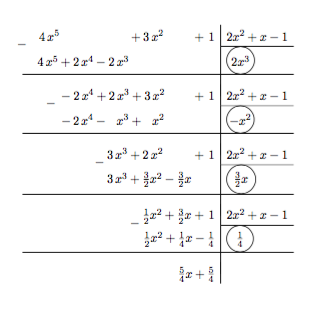

In [2]:
from IPython.display import Image
Image("polidiv.png")

A figura ilustra a divisão de ${\bf\tt p}(x)=4x^5+3x^2+1$ por ${\bf\tt q}(x)=2x^2+x-1$. O quociente da divisão é ${\bf\tt d}(x)=2x^3-x^2+\frac{3}{2}x+\frac{1}{4}$ e o resto é ${\bf\tt r}(x)=\frac{5}{4}x +\frac{5}{4}$. Como seria de esperar, tem-se ${\bf\tt p}(x)={\bf\tt q}(x)\times{\bf\tt d}(x)+{\bf\tt r}(x)$.

A divisão é obtida subtraindo repetidamente ao dividendo (${\bf\tt p}(x)$, ou o que dele restar) o produto do divisor ${\bf\tt q}(x)$ por um monómio escolhido de forma a igualar os monómios de maior grau de ambos. O processo termina quando o grau do dividendo é inferior ao grau do divisor, caso em que o dividendo se denomina o resto da divisão. O quociente da divisão obtém-se somando os vários monómios usados ao longo da divisão (dentro de círculos, na figura).

Segue-se a respectiva implementação.

In [6]:
def division(p,q):
    d=mono(0,0)
    s=mono(-1,0)
    while degree(p)>=degree(q):
        m=mono(maincoef(p)/maincoef(q),degree(p)-degree(q))
        d=sum(d,m)
        p=sum(p,prod(s,prod(m,q)))
    return (d,p)

Vamos confirmar a divisão ilustrada acima. 

In [7]:
division([4,0,0,3,0,1],[2,1,-1])

([2.0, -1.0, 1.5, 0.25], [1.25, 1.25])

## O algoritmo *quick sort* revisitado

Recorde-se a implementação feita no Notebook 06 do algoritmo de ordenação `quicksort`. 

In [50]:
def split(w):
    x=w[0]
    left=[]
    right=[]
    for i in range(1,len(w)):
        if w[i]<=x:
            left+=[w[i]]
        else:
            right+=[w[i]]
    return left,x,right

def quicksort(w):
    if len(w)<2:
        return w
    else:
        w1,x,w2=split(w)
        return quicksort(w1)+[x]+quicksort(w2)

A expressão mais natural do algoritmo quicksort é recursiva, o que é um fenómeno mais frequente do que possamos à partida imaginar.

A recursão é implementada, em qualquer computador, através de uma pilha de chamadas. No contexto em que acabámos de fazer uma implementação deste tipo de dados, podemos reutilizá-la para construir uma versão puramente imperativa do mesmo algoritmo.

In [51]:
def quickimp(w):
    res=[]
    pilha=stack.push(w,stack.new())
    while not stack.emptyQ(pilha):
        u=stack.top(pilha)
        pilha=stack.pop(pilha)
        if len(u)<2:
            res+=u
        else:
            u1,x,u2=split(u)
            pilha=stack.push(u1,stack.push([x],stack.push(u2,pilha)))
    return res

In [52]:
from random import shuffle
w=list(range(10))
shuffle(w)
w,quickimp(w)

([4, 5, 6, 8, 2, 3, 7, 0, 1, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Vale a pena emular a execução para compreender a ideia subjacente.

Podemos ainda ilustrar a independência da implementação do algoritmo de ordenação relativamente aos detalhes da implementação do tipo de dados. Considere-se a seguinte implementação alternativa, definida no módulo `stackR`.

In [ ]:
# %load modules/stackR
# alternative stacks, upsidedown implementation

def new():
    return []

def push(x,s):
    return [x]+s

def emptyQ(s):
    return s==[]
    
def pop(s):
    if emptyQ(s):
        print("Erro! A pilha esta vazia.")
    else:
        return s[1:]
    
def top(s):
    if emptyQ(s):
        print("Erro! A pilha esta vazia.")
    else:
        return s[0]
        
def view(s):
    ns = []
    for x in s:
        ns=[x]+ns
    print (ns)

In [53]:
import stackR as stack

In [54]:
w=list(range(10))
shuffle(w)
w,quickimp(w)

([9, 7, 4, 5, 6, 3, 2, 0, 1, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Todas as definições recursivas podem ser simuladas imperativamente desta forma, usando pilhas. Deixa-se como exercício ao leitor construir definições imperativas equivalentes às diversas definições recursivas que já fizemos, nomeadamente para o algoritmo de ordenação `mergesort`.

## IDE - Spyder

Até agora temos vindo a desenvolver todos os programas em *notebooks* do sistema Jupyter, disponibilizado na plataforma Anaconda. No entanto, à medida que os programas crescem em complexidade pode ser necessário mudar de plataforma. Para definir um módulo, por exemplo, como o módulo das pilhas é necessário escrever o código num ficheiro diferente, que não é um notebook e não pode ser definido como tal! Podemos, como é evidente, recorrer a um editor de texto básico para escrever o código, mas tal não é recomendável. A melhor solução é recorrer a um *ambiente de desenvolvimento integrado* (IDE - *integrated development environment*). Um IDE consiste usualmente num editor de código, em ferramentas de compilação e num *debugger*. O editor de código pode dispôr de facilidades como reconhecimento das palavras reservadas, indicação de erros de sintaxe, entre outros. Existem inúmeros IDEs para a linguagem Python. No seguimento, ilustramos a utilização do IDE Sypder, também disponível na plataforma Anaconda.

Ao iniciar o Sypder, surge uma janela com o seguinte aspecto:

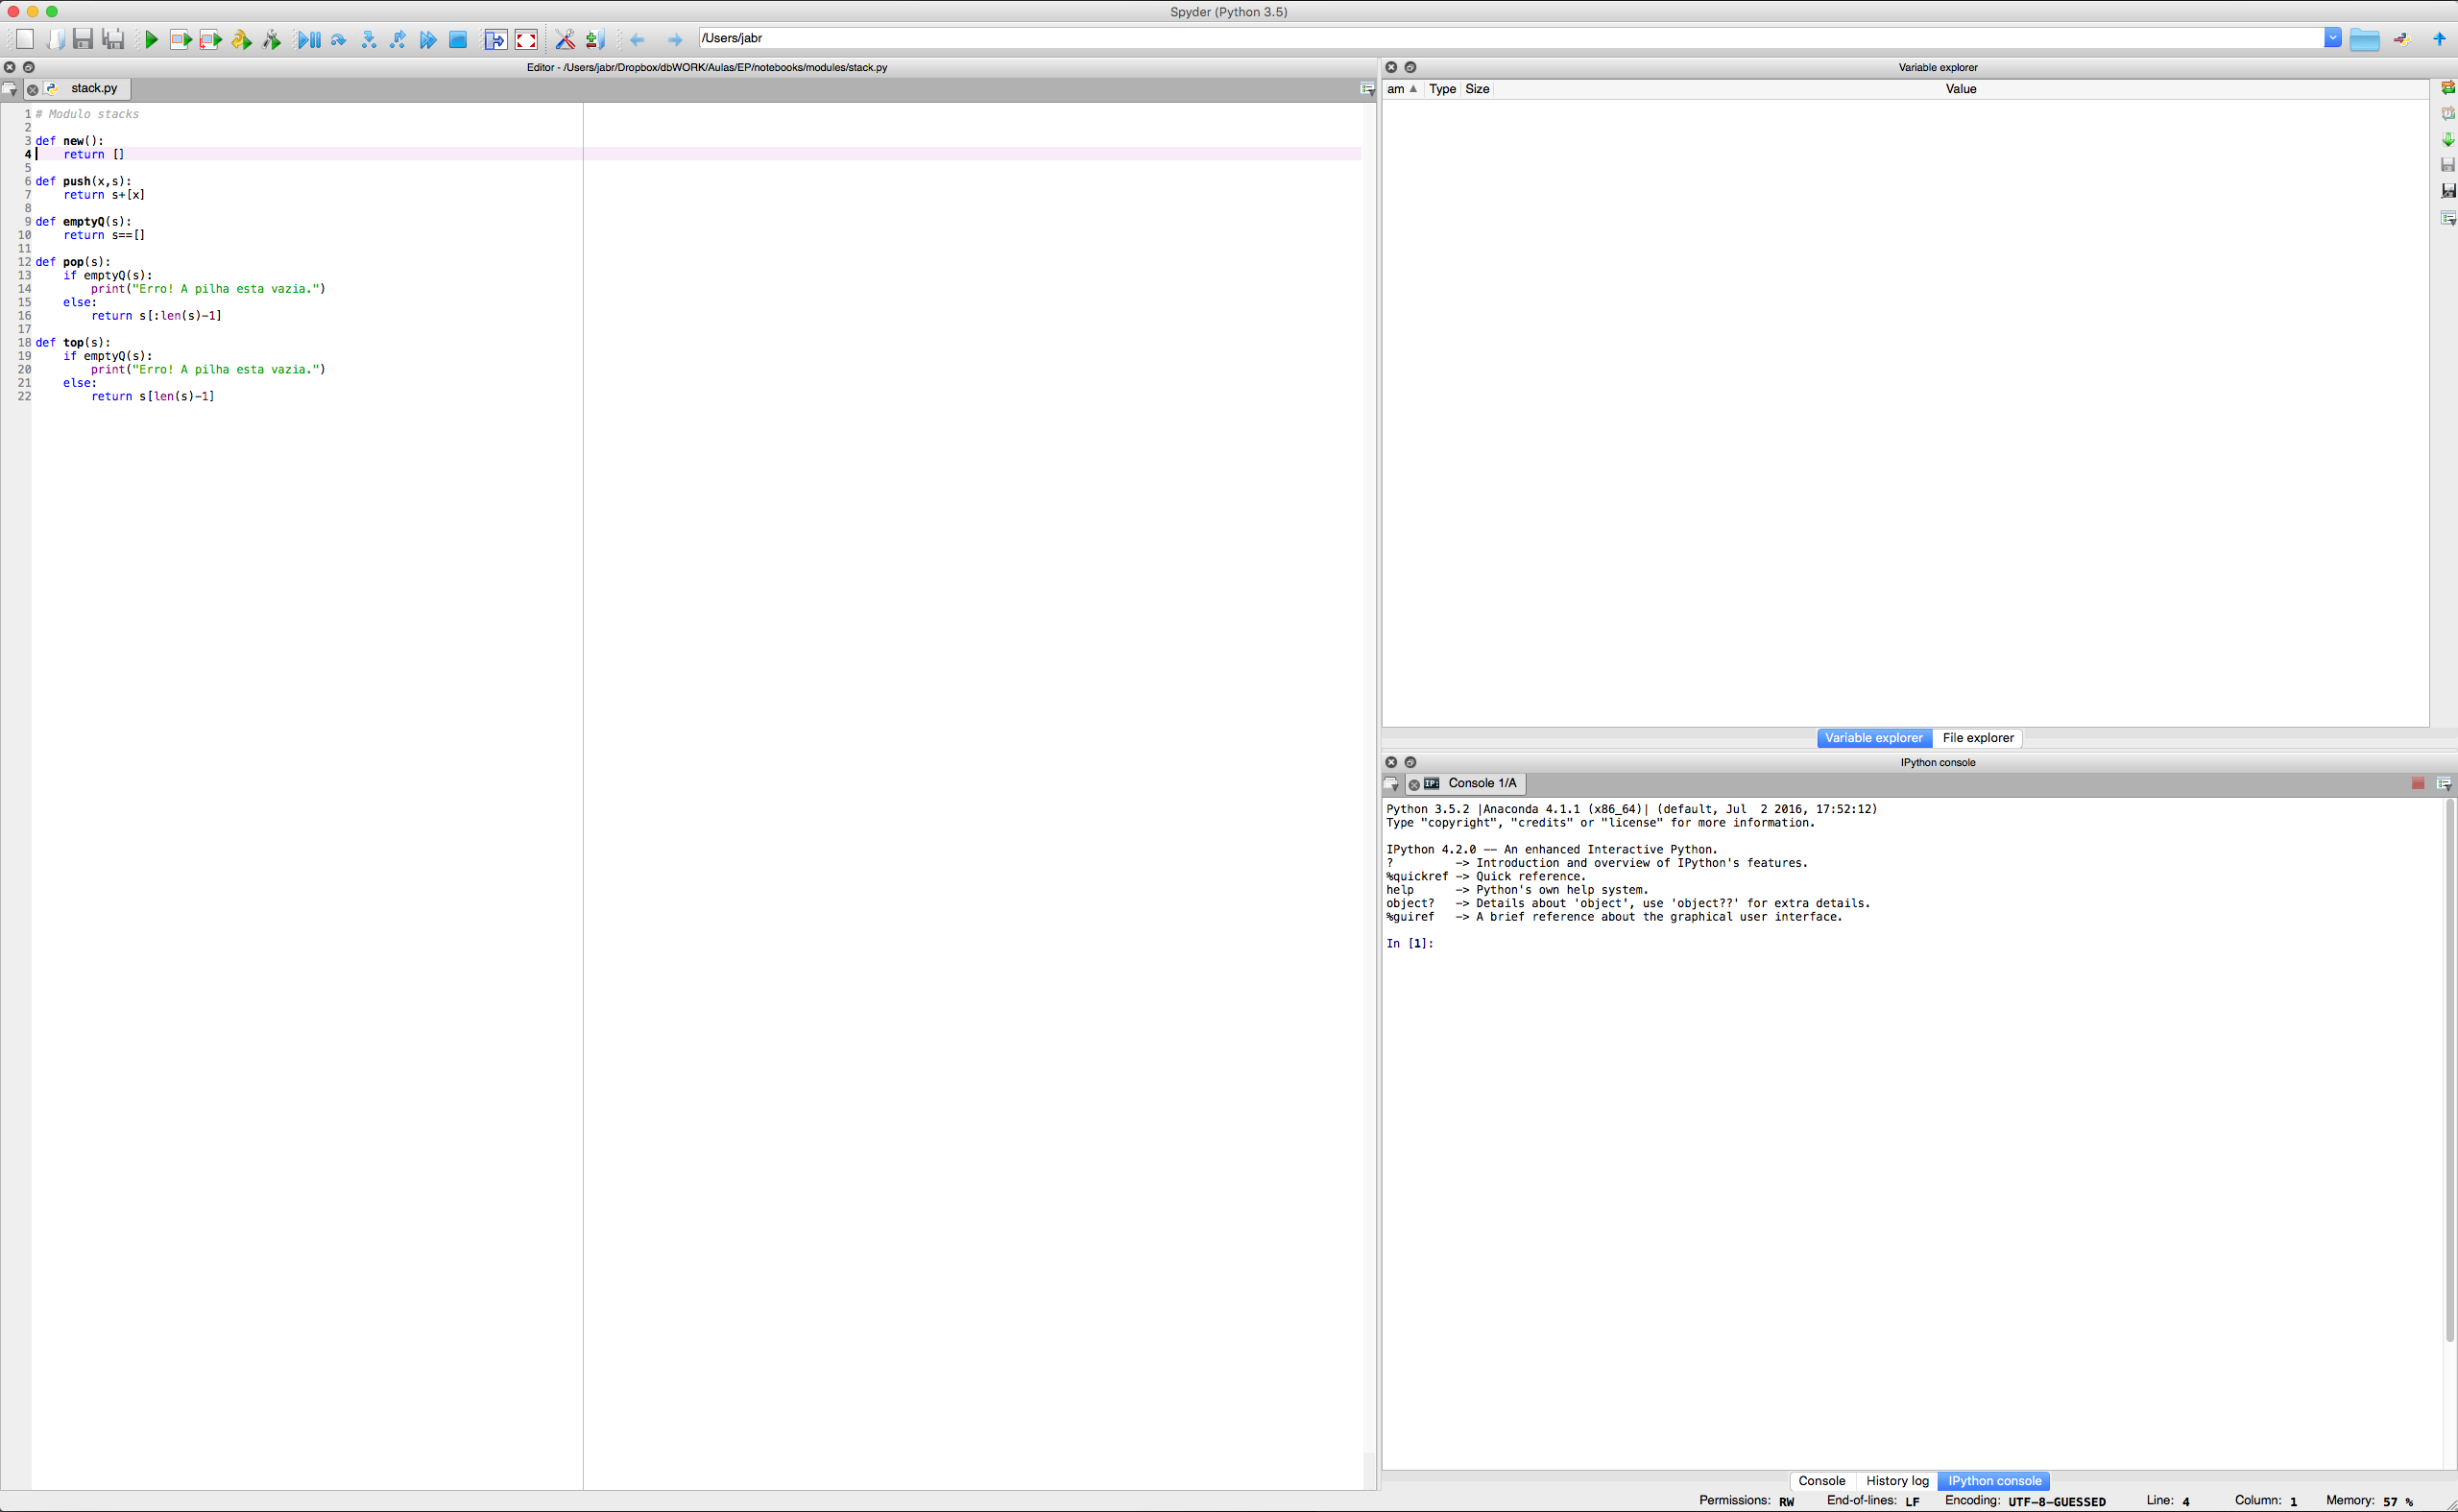

In [56]:
from IPython.display import Image
Image("spyder1.png")

A janela do lado esquerdo é a janela de edição de código. Funciona como um editor de texto normal mas reconhece a estrutura do código Python, usando um código de cores para facilitar a leitura dos programas. Dispõe também de um corrector de sintaxe que nos dá indicações sobre possíveis erros de sintaxe que possamos estar a cometer mesmo antes de executar o programa. Do lado direito temos duas janelas. A janela superior, denominada `Variable explorer` mantem actualizada a informação sobre as variáveis que vão sendo usadas durante cada sessão. A janela inferior, denomindada `IPython console`, disponibiliza um interface com o IPython, que nos permite interagir com o programa (de forma interactiva). Para o programa ficar disponível no ambiente interactivo é necessário executá-lo. A maneira mais expedita de o fazer é clicando na seta verde que se encontra na barra de ferramentas no topo da janela. O ambiente interactivo continua a disponiblizar todas as funcionalidades do IPython que temos vindo a usar nos notebooks Jupyter. Segue-se um pequeno exemplo de uma sessão.

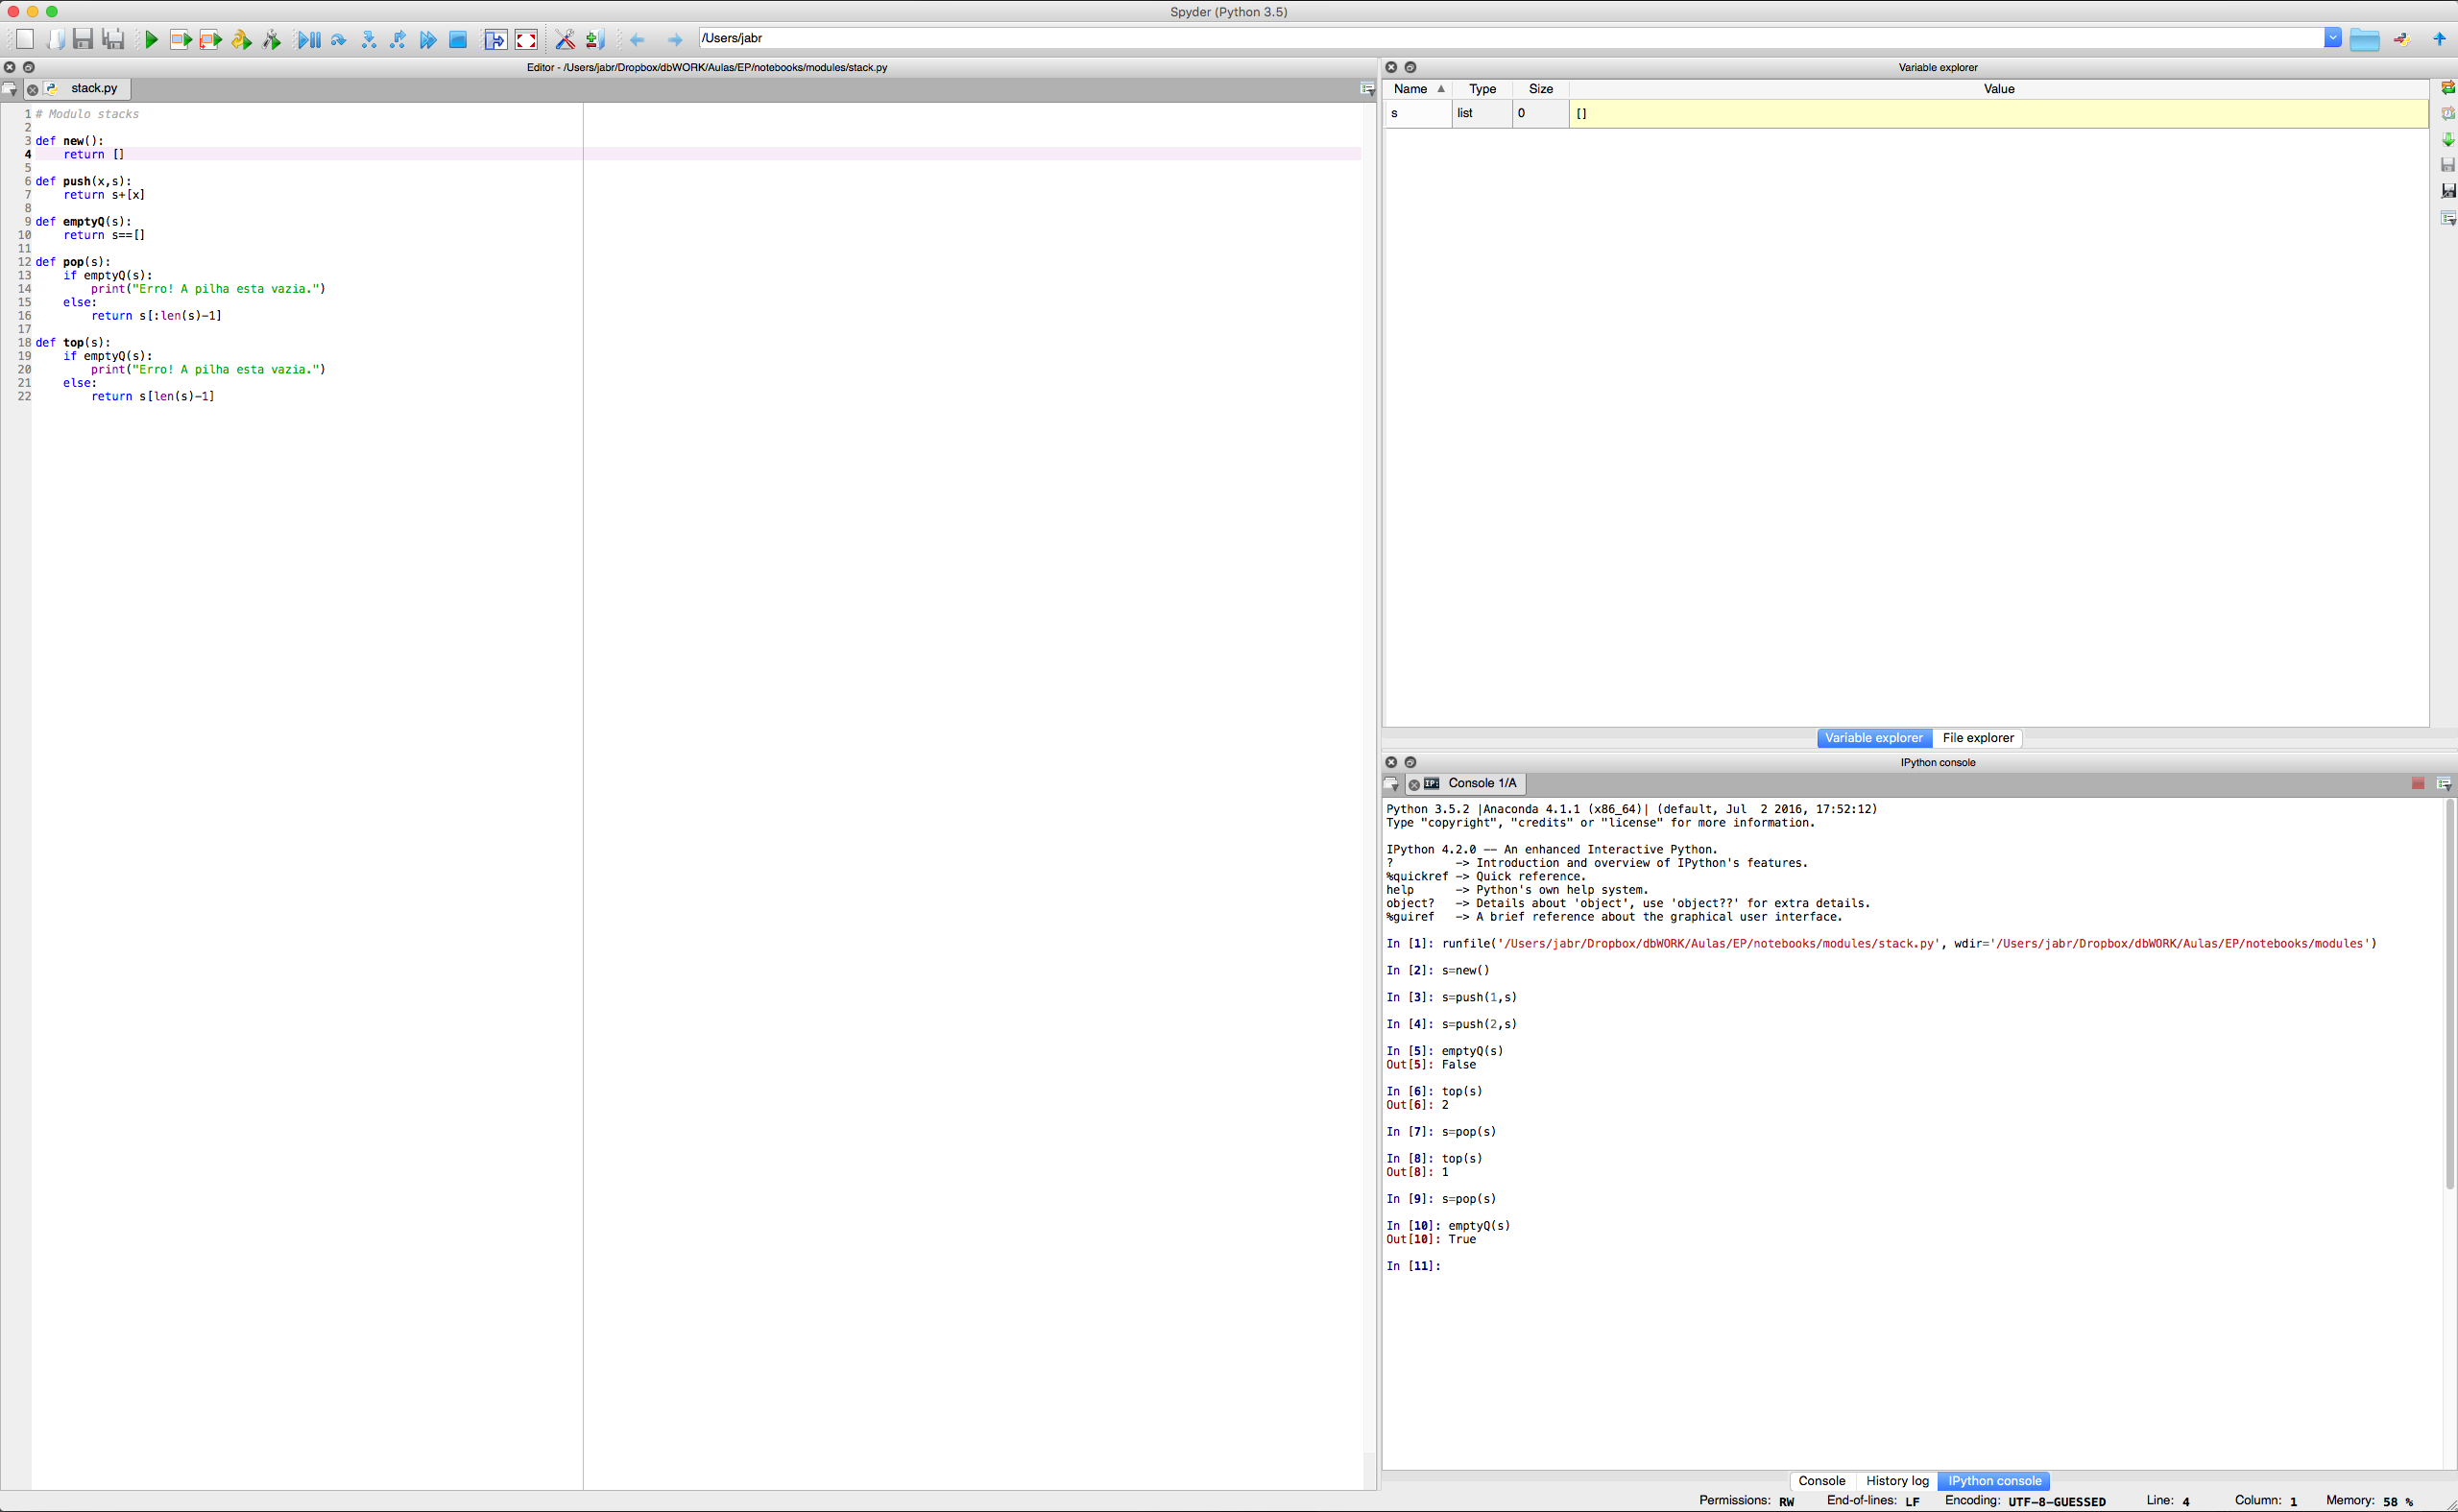

In [57]:
Image("spyder2.png")

Deixa-se como exercício explorar o IDE Sypder e testar alguns dos programas desenvolvidos até agora. Nomeadamente, desenvolver o módulo das pilhas e o programa Hanoi, e testá-los. Nota: ao desenvolver o programa Hanoi, não convém esquecer que é preciso indicar no ficheiro que se pretende utilizar o módulo das pilhas. Tal é conseguido, como seria de esperar, incluido no início do ficheiro a instrução de importação do módulo.

# Sumário

* Os mecanismos de modularização são essenciais à programação em grande (maior) escala, aprofundando a ideia de subdividir um problema em subproblemas cada vez mais simples.
* É importante que os módulos garantam encapsulamento das implementações, por forma a garantir que os programas que os utilizam sejam independentes de eventuais alterações às opções de implementação.
* Módulos correctamente concebidos podem ser reutilizados nos mais variados contextos.
* É particularmente útil adoptar o método de programação por camadas centradas nos dados, em que os tipos de dados necessários, devidamente hierarquizados, são implementados e disponibilizados, de forma independente, em módulos implementados de forma eficiente.
* Fixada a interface de cada tipo de dados, os módulos que os implementam, bem como o programa abstracto que resolve o problema dado, podem ser desenvolvidos independentemente, nomeadamente por equipas de programadores.
* Na concepção de programas mais ricos, e por forma a melhor suportar os mecanismos de modularização, aconselha-se a utilização de um IDE como o *Spyder*.

# Bibliografia

*Introdução à Programação em Mathematica* (3a edição): J. Carmo, A. Sernadas, C. Sernadas, F. M. Dionísio, C. Caleiro, IST Press, 2014.

*Think Python: How to think like a computer scientist*: A. Downey, Green Tea Press, 2012.

*Introduction to Computation and Programming Using Python* (revised and expanded edition): J. V. Guttag, MIT Press,  2013.

*The Art of Computer Programming*: D. E. Knuth, Addison-Wesley (volumes 1--3, 4A), 1998.

*Learning Python* (fifth edition): M. Lutz, O'Reilly Media,  2013.

*Programação em Python: Introdução à programação utilizando múltiplos paradigmas*: J. P. Martins, IST Press, 2015.

*Introdução à Programação em MatLab*: J. Ramos, A. Sernadas e P. Mateus, DMIST, 2005. 

*Learning IPython for Interactive Computing and Data Visualization*: C. Rossant, Packt Publishing,  2013.

*Programação em Mathematica*: A. Sernadas, C. Sernadas e J. Ramos, DMIST, 2003.